# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import math
import time
import os
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# function to call API
def requestWeatherAPI():
    counter = 1
    sets = 1
    max_counter = 51
    first_iter = True
    start_index = 0
        
    len_cities = len(cities)
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "metric"
    query_url = f"{url}appid={api_key}&units={units}&q="
    
    print('Beginning Data Retrieval') 
    print('-----------------------------')

    while start_index < len_cities:
        try:
            response = requests.get(query_url+cities[start_index]).json()
            #print(response)
            if int(response['cod']) == 200:
                print(f'Processing Record {counter} of Set {sets} | {cities[start_index]}')
                city.append(response['name'])
                cloudiness.append(response['clouds']['all'])
                country.append(response['sys']['country'])
                date.append(response['dt'])
                humidity.append(response['main']['humidity'])
                lat.append(response['coord']['lat'])
                lng.append(response['coord']['lon'])
                maxtemp.append(response['main']['temp_max'])
                windsped.append(response['wind']['speed'])
                counter += 1
            elif int(response['cod']) == 404:
                print('City not found. Skipping...')
            # following if condition is added to print same kind of output given in notebook
            if first_iter == True:
                if counter == max_counter:
                    counter = 0
                    sets += 1
                    # adding sleep to comply with OWM policy
                    time.sleep(60)
                    first_iter = False
            else:
                if counter == max_counter - 1:
                    counter = 0
                    sets += 1
                    time.sleep(20)
                    first_iter = False        
        except KeyError: 
            print("Key not found...")
        # Call any unmwanted exception
        except Exception as e: 
            print("Catching generic exception..." + str(e))
        finally:
            start_index += 1
    print('-----------------------------')
    print('Data Retrieval Complete') 
    print('-----------------------------')

In [5]:
# Calling function
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windsped = []
requestWeatherAPI()

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | morondava
Processing Record 6 of Set 1 | atambua
Processing Record 7 of Set 1 | ketchikan
Processing Record 8 of Set 1 | cap malheureux
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | makakilo city
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | amahai
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | fowa
Processing Record 20 of Set 1 | levokumskoye
City not found. Skipping...
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 

Processing Record 33 of Set 4 | pochutla
Processing Record 34 of Set 4 | grindavik
Processing Record 35 of Set 4 | ternate
Processing Record 36 of Set 4 | saint anthony
Processing Record 37 of Set 4 | barranca
Processing Record 38 of Set 4 | umea
Processing Record 39 of Set 4 | namibe
City not found. Skipping...
Processing Record 40 of Set 4 | chipinge
Processing Record 41 of Set 4 | sao jose da coroa grande
Processing Record 42 of Set 4 | praia da vitoria
Processing Record 43 of Set 4 | matara
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | marawi
Processing Record 46 of Set 4 | presidencia roque saenz pena
Processing Record 47 of Set 4 | sahagun
City not found. Skipping...
Processing Record 48 of Set 4 | grand gaube
Processing Record 49 of Set 4 | dvinskoy
Processing Record 0 of Set 5 | coahuayana
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | mason city
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | galesong
City not

Processing Record 20 of Set 8 | san patricio
Processing Record 21 of Set 8 | tadine
Processing Record 22 of Set 8 | kargasok
Processing Record 23 of Set 8 | merauke
Processing Record 24 of Set 8 | inirida
Processing Record 25 of Set 8 | asosa
Processing Record 26 of Set 8 | prince rupert
Processing Record 27 of Set 8 | kuliyapitiya
Processing Record 28 of Set 8 | yumen
Processing Record 29 of Set 8 | mahebourg
Processing Record 30 of Set 8 | cidreira
Processing Record 31 of Set 8 | palencia
Processing Record 32 of Set 8 | bilibino
Processing Record 33 of Set 8 | ballina
Processing Record 34 of Set 8 | buala
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | yatou
Processing Record 37 of Set 8 | irricana
Processing Record 38 of Set 8 | puro
Processing Record 39 of Set 8 | bosaso
Processing Record 40 of Set 8 | olavarria
Processing Record 41 of Set 8 | moba
Processing Record 42 of Set 8 | kuntaur
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp etc.
weather_dict = {
    "City": city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng" : lng,
    "Max Temp" : maxtemp,
    "Wind Speed" : windsped
}
weather_data = pd.DataFrame(weather_dict)

# create directory to save file
if not os.path.exists('output_data'):
    os.mkdir('output_data')
    
weather_data.to_csv(output_data_file)
weather_data.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,48,IN,1538233730,96,15.34,74.49,22.96,0.46
1,Atuona,0,PF,1538233617,100,-9.80,-139.03,26.21,5.01
2,Port Alfred,0,ZA,1538233730,78,-33.59,26.89,19.06,3.51
3,Alofi,56,NU,1538229600,83,-19.06,-169.92,23.00,4.60
4,Morondava,32,MG,1538233730,78,-20.30,44.28,26.86,4.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

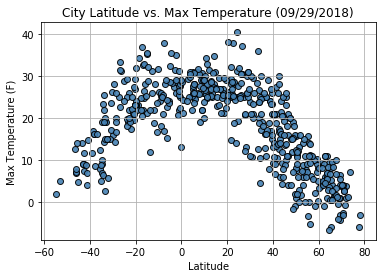

In [8]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=.9, linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save Figure
plt.savefig('output_data/LatvsTemp.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

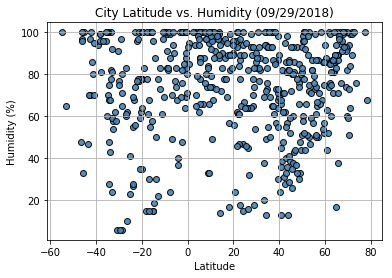

In [9]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=.9, linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save Figure
plt.savefig('output_data/LatvsHumidity.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

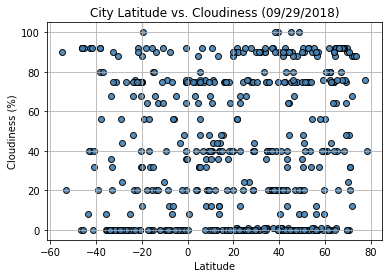

In [10]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=.9, linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save Figure
plt.savefig('output_data/LatvsCloudiness.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

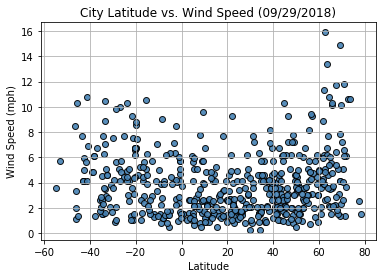

In [11]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=.9, linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
# Save Figure
plt.savefig('output_data/LatvsWind.png')

# Show plot
plt.show()